In [1]:
import numpy as np
import pandas as pd
import joblib
import shap
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from feature_settings import *
from train_models import Train_Models

In [2]:
whole_filepath = r"C:\Users\55479\PycharmProjects\MS_thesis\datasets\whole_df_all_features_simple_option_return.csv"
straddle_filepath = r"C:\Users\55479\PycharmProjects\MS_thesis\datasets\straddle_df_all_features_straddle_return.csv"
straddle_settlement_value = r"C:\Users\55479\PycharmProjects\MS_thesis\datasets\straddle_df_all_features_settlement_value.csv"

In [3]:
straddle_models = Train_Models(straddle_settlement_value, 'settlement_value')

In [4]:
linear_model = straddle_models.linear()
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = linear_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = linear_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is linear
🔹 Training Set Metrics:
R²:   0.9989
MSE:  920.7354
MAE:  20.6163
RMSE: 30.3436
MAPE: 0.0074

🔹 Test Set Metrics:
R²:   0.9562
MSE:  2501.1471
MAE:  38.8026
RMSE: 50.0115
MAPE: 0.0096



In [5]:
lasso_params = {
    "scaler": "standard",
    "alpha": 0.8431013932082461,
    "selection": "random",
    "max_iter": 6000,
    "tol": 0.0001238513729886094,
    "fit_intercept": True,
    "random_state": 42,
    "copy_X": True,
    "warm_start": False,
    "precompute": False
}

lasso_model = straddle_models.lasso(lasso_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = lasso_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = lasso_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is lasso
🔹 Training Set Metrics:
R²:   0.9987
MSE:  1107.4295
MAE:  21.9632
RMSE: 33.2781
MAPE: 0.0077

🔹 Test Set Metrics:
R²:   0.9555
MSE:  2541.5766
MAE:  39.4724
RMSE: 50.4141
MAPE: 0.0098



In [6]:
ridge_params = {
    "scaler": "minmax",
    "alpha": 99.99820623812793,
    "fit_intercept": True,
    "solver": "auto",  # Let sklearn choose optimal solver
    "copy_X": True,
    "random_state": 42
}

ridge_model = straddle_models.ridge(ridge_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = ridge_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = ridge_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is ridge
🔹 Training Set Metrics:
R²:   0.9746
MSE:  21861.6251
MAE:  116.6550
RMSE: 147.8568
MAPE: 0.0458

🔹 Test Set Metrics:
R²:   0.5189
MSE:  27493.6722
MAE:  131.5903
RMSE: 165.8122
MAPE: 0.0314



In [7]:
elastic_params = {
    "scaler": "minmax",
    "alpha": 1.274671157821506,
    "l1_ratio": 0.4461372443656411,
    "max_iter": 2000,
    "tol": 0.0009780337016659412,
    "selection": "random",
    "fit_intercept": True,
    "positive": False,  # Set to False unless you have domain knowledge requiring positive coefficients
    "copy_X": True,  # Always copy to avoid data modification
    "precompute": False,  # Auto-handled by sklearn, manual setting can cause conflicts
    "warm_start": False,  # Not useful in hyperparameter optimization context
    "random_state": 42  # For reproducibility
}

elastic_model = straddle_models.elastic(elastic_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = elastic_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = elastic_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_full_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is elastic
🔹 Training Set Metrics:
R²:   0.9247
MSE:  64846.6428
MAE:  189.1188
RMSE: 254.6500
MAPE: 0.0666

🔹 Test Set Metrics:
R²:   0.4067
MSE:  33903.7341
MAE:  144.4131
RMSE: 184.1297
MAPE: 0.0347



In [8]:
xgb_params = {
    "scaler": "standard",
    "learning_rate": 0.010144971202424531,
    "max_depth": 4,
    "subsample": 0.7005548694043554,
    "min_child_weight": 7,
    "tree_method": "hist",
    "random_state": 42,
    "early_stopping_rounds": 10,
    "n_estimators": 10000,
}

xgb_model = straddle_models.xgb(xgb_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = xgb_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = xgb_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is xgb
🔹 Training Set Metrics:
R²:   0.9997
MSE:  196.9196
MAE:  10.1020
RMSE: 14.0328
MAPE: 0.0040

🔹 Test Set Metrics:
R²:   0.9032
MSE:  5531.6278
MAE:  63.5299
RMSE: 74.3749
MAPE: 0.0154



In [9]:
lgb_params = {
    "scaler": "robust",
    "num_leaves": 25,
    "learning_rate": 0.29629303834448767,
    "n_estimators": 10000,
    "min_data_in_leaf": 55,
    "random_state": 42,
    "verbose": -1,
    "early_stopping_rounds": 10,
}


lgb_model = straddle_models.lgb(lgb_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = lgb_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = lgb_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is lgb
🔹 Training Set Metrics:
R²:   0.9988
MSE:  826.2348
MAE:  18.7104
RMSE: 28.7443
MAPE: 0.0074

🔹 Test Set Metrics:
R²:   0.8364
MSE:  9347.0986
MAE:  73.9508
RMSE: 96.6804
MAPE: 0.0177



In [10]:
cat_params = {
    "scaler": "none",
    "depth": 6,
    "learning_rate": 0.2414554320781304,
    "iterations": 10000,
    "l2_leaf_reg": 3.6102526870615455,
    "loss_function": "RMSE",  # Regression loss
    "eval_metric": "RMSE",   # Evaluation metric
    "random_seed": 42,
    "allow_writing_files": False,  # Don't write temp files
    "verbose": 0,
    "early_stopping_rounds": 10,
}


cat_model = straddle_models.cat(cat_params)
print(f"=== The current trained model is {straddle_models.model}")

y_train_pred = cat_model.predict(straddle_models.get_X_train_scaled())
y_test_pred = cat_model.predict(straddle_models.get_X_test_scaled())

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

=== The current trained model is cat
🔹 Training Set Metrics:
R²:   0.9981
MSE:  1299.2455
MAE:  28.1091
RMSE: 36.0450
MAPE: 0.0118

🔹 Test Set Metrics:
R²:   -5.1251
MSE:  350002.4862
MAE:  572.3143
RMSE: 591.6101
MAPE: 0.1389



In [ ]:
mlp_params = {
    "scaler": "standard",
    "num_layers": 6,
    "activation": "tanh",
    "first_layer_size": 192,
    "layer_1_ratio": 0.7666880719011199,
    "layer_2_ratio": 0.48684454075109973,
    "layer_3_ratio": 0.30214812565299837,
    "layer_4_ratio": 0.3606002213732059,
    "layer_5_ratio": 0.7952331653069764,
    "learning_rate": 0.007246302768929668,
    "batch_size": 32,
    "epochs": 1000,
    "dropout_rate": 0.3524627613647506,
    "weight_decay": 0.0001088270522618714,
    "batch_norm": False,
    "optimizer": "RMSprop",
    "scheduler": "ExponentialLR",
    "gamma": 0.9130351226782238
}


mlp_model = straddle_models.mlp(mlp_params)
print(f"=== The current trained model is {straddle_models.model} ===")

mlp_model.eval()
with torch.no_grad():
    # Convert entire test dataset to tensor
    X_test_tensor = torch.tensor(straddle_models.get_X_test_scaled().to_numpy(), dtype=torch.float32)
    y_test_pred = mlp_model(X_test_tensor)
    y_test_pred = y_test_pred.numpy()

with torch.no_grad():
    # Convert entire train dataset to tensor
    X_train_tensor = torch.tensor(straddle_models.get_X_train_scaled().to_numpy(), dtype=torch.float32)
    y_train_pred = mlp_model(X_train_tensor)
    y_train_pred = y_train_pred.numpy()

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\55479\PycharmProjects\MS_thesis\.venv\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\55479\PycharmProjects\MS_thesis\.venv\lib\site-packages\torch\optim\lr_scheduler.py:198: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
  2%|▏         | 20/10

=== Model saving has been done ===
=== The current trained model is mlp ===
🔹 Training Set Metrics:
R²:   -9.9923
MSE:  7430509.1371
MAE:  2598.9485
RMSE: 2725.8960
MAPE: 0.9927

🔹 Test Set Metrics:
R²:   -289.9950
MSE:  16628128.4900
MAE:  4070.7476
RMSE: 4077.7602
MAPE: 0.9958



In [12]:
lstm_params = {
    "scaler": "none",
    "sequence_length": 48,
    "hidden_dim": 32,
    "num_lstm_layers": 3,
    "bidirectional": False,
    "lstm_dropout": 0.35260206066020455,
    "use_fc_layers": False,
    "activation": "gelu",
    "learning_rate": 0.0006829856881731791,
    "batch_size": 64,
    "epochs": 1000,
    "dropout_rate": 0.12104562863085641,
    "weight_decay": 8.556164082715794e-05,
    "batch_norm": False,
    "optimizer": "AdamW",
    "scheduler": "StepLR",
    "step_size": 28
}

lstm_model = straddle_models.lstm(lstm_params)
print(f"=== The current trained model is {straddle_models.model} ===")

lstm_model.eval()
with torch.no_grad():
    # Convert entire test dataset to tensor
    X_test_tensor = torch.tensor(straddle_models.get_X_test_scaled().to_numpy(), dtype=torch.float32)
    X_test_tensor = X_test_tensor.unsqueeze(1)
    y_test_pred = lstm_model(X_test_tensor)
    y_test_pred = y_test_pred.numpy()

with torch.no_grad():
    # Convert entire train dataset to tensor
    X_train_tensor = torch.tensor(straddle_models.get_X_train_scaled().to_numpy(), dtype=torch.float32)
    X_train_tensor = X_train_tensor.unsqueeze(1)
    y_train_pred = mlp_model(X_train_tensor)
    y_train_pred = y_train_pred.numpy()

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

  0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\55479\PycharmProjects\MS_thesis\.venv\lib\site-packages\torch\optim\lr_scheduler.py:198: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
  2%|▏         | 20/1000 [00:16<13:46,  1.19it/s]

=== The current trained model is lstm ===
🔹 Training Set Metrics:
R²:   -10.2478
MSE:  7603238.5379
MAE:  2631.9694
RMSE: 2757.3971
MAPE: 1.0067

🔹 Test Set Metrics:
R²:   -292.4459
MSE:  16768179.5626
MAE:  4087.9136
RMSE: 4094.8968
MAPE: 1.0000



In [13]:
gru_params = {
    "scaler": "standard",
    "sequence_length": 7,
    "hidden_dim": 128,
    "num_gru_layers": 3,
    "bidirectional": False,
    "gru_dropout": 0.14084447802558342,
    "use_fc_layers": True,
    "num_fc_layers": 2,
    "fc_layer_0_size": 64,
    "fc_layer_1_size": 32,
    "activation": "leaky_relu",
    "learning_rate": 0.0003107021727174808,
    "batch_size": 16,
    "epochs": 1000,
    "dropout_rate": 0.00018761415268769496,
    "weight_decay": 1.1845056936929588e-05,
    "batch_norm": False,
    "optimizer": "Adam",
    "scheduler": "ReduceLROnPlateau"
}

gru_model = straddle_models.gru(gru_params)
print(f"=== The current trained model is {straddle_models.model} ===")

gru_model.eval()
with torch.no_grad():
    # Convert entire test dataset to tensor
    X_test_tensor = torch.tensor(straddle_models.get_X_test_scaled().to_numpy(), dtype=torch.float32)
    X_test_tensor = X_test_tensor.unsqueeze(1)
    y_test_pred = gru_model(X_test_tensor)
    y_test_pred = y_test_pred.numpy()

with torch.no_grad():
    # Convert entire train dataset to tensor
    X_train_tensor = torch.tensor(straddle_models.get_X_train_scaled().to_numpy(), dtype=torch.float32)
    X_train_tensor = X_train_tensor.unsqueeze(1)
    y_train_pred = gru_model(X_train_tensor)
    y_train_pred = y_train_pred.numpy()

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

del gru_model

  5%|▌         | 52/1000 [01:47<32:39,  2.07s/it]  

=== The current trained model is gru ===
🔹 Training Set Metrics:
R²:   -2.4337
MSE:  2321101.6406
MAE:  1289.9081
RMSE: 1523.5162
MAPE: 0.4393

🔹 Test Set Metrics:
R²:   -132.7753
MSE:  7644229.4782
MAE:  2754.4644
RMSE: 2764.8200
MAPE: 0.6727



In [14]:
straddle_return_mean = straddle_models.y_train.mean()
y_train_pred = np.full(len(straddle_models.get_y_train()), straddle_return_mean)
y_test_pred = np.full(len(straddle_models.get_y_test()), straddle_return_mean)

train_r2, train_mse, train_mae, train_rmse, train_mape = straddle_models.metrics(straddle_models.get_y_train(), y_train_pred)
test_r2, test_mse, test_mae, test_rmse, test_mape = straddle_models.metrics(straddle_models.get_y_test(), y_test_pred)

print("🔹 Training Set Metrics:")
print(f"R²:   {train_r2:.4f}")
print(f"MSE:  {train_mse:.4f}")
print(f"MAE:  {train_mae:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAPE: {train_mape:.4f}\n")

print("🔹 Test Set Metrics:")
print(f"R²:   {test_r2:.4f}")
print(f"MSE:  {test_mse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAPE: {test_mape:.4f}\n")

🔹 Training Set Metrics:
R²:   0.0000
MSE:  675975.8066
MAE:  645.6172
RMSE: 822.1775
MAPE: 0.2863

🔹 Test Set Metrics:
R²:   -37.9087
MSE:  2223334.9512
MAE:  1471.7991
RMSE: 1491.0852
MAPE: 0.3578



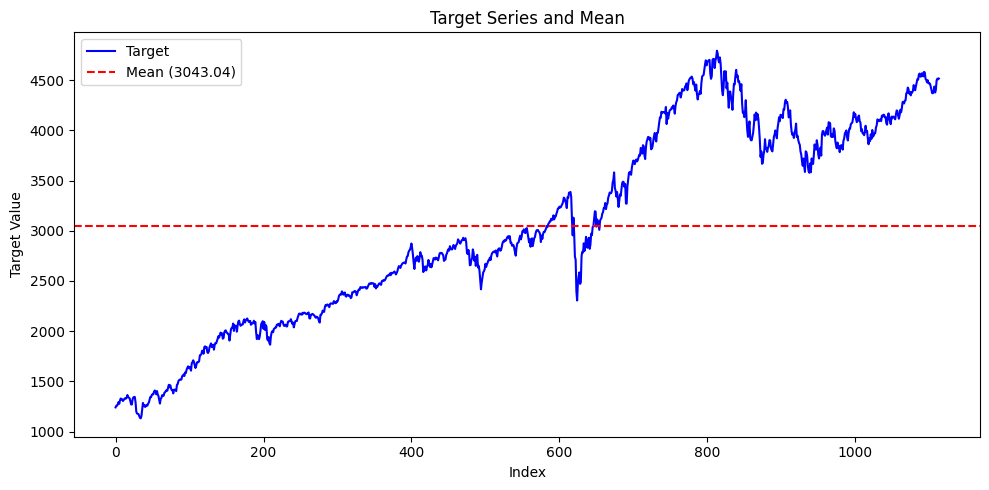

In [15]:
# Suppose y is your target pd.Series
# Example: y = pd.Series(np.random.randn(100))
y = straddle_models.y

plt.figure(figsize=(10, 5))

# Plot the target series
plt.plot(y.index, y.values, label='Target', color='blue')

# Plot the mean as a horizontal line
mean_y = y.mean()
plt.axhline(mean_y, color='red', linestyle='--', label=f'Mean ({mean_y:.2f})')

plt.title('Target Series and Mean')
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
print(y.mean(), y.std())

3043.037271095153 987.205976830176


In [17]:
X = np.ones(len(y))  # Only the constant

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       settlement_value   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 19 Jul 2025   Prob (F-statistic):                nan
Time:                        15:23:37   Log-Likelihood:                -9261.1
No. Observations:                1114   AIC:                         1.852e+04
Df Residuals:                    1113   BIC:                         1.853e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3043.0373     29.578    102.883      0.0

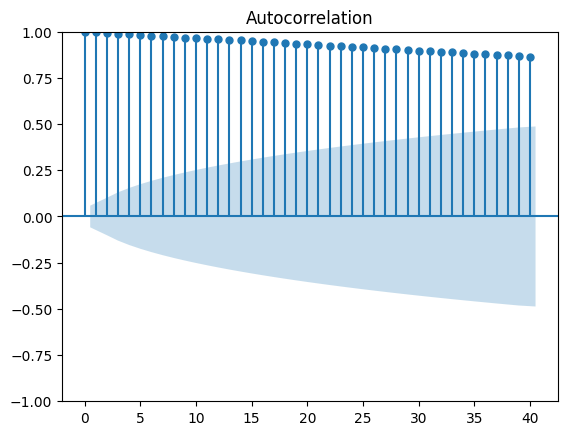

In [18]:
plot_acf(y, lags=40)
plt.show()

In [19]:
# feature_names = list(straddle_models.X.columns)

# def model_predict(x):
#     mlp_model.eval()
#     with torch.no_grad():
#         x_tensor = torch.tensor(x, dtype=torch.float32)
#         return mlp_model(x_tensor).numpy()

# X_train_scaled, X_val_scaled, X_test_scaled = straddle_models.scale_transform_tree_nn(mlp_params)

# # Create explainer
# explainer = shap.Explainer(model_predict, X_train_scaled.to_numpy())  # Use numpy array

# # Get SHAP values
# shap_values = explainer(X_test_scaled.to_numpy())

# # Create DataFrame with feature names for plotting
# shap_df = pd.DataFrame(shap_values.values, columns=feature_names)

# # Plot with feature names
# shap.summary_plot(shap_values, X_test_scaled.to_numpy(), feature_names=feature_names)

In [20]:
# import shap
# import matplotlib.pyplot as plt

# # Or use the older syntax
# shap.summary_plot(shap_values, X_test_scaled.to_numpy(), plot_type='bar', feature_names=feature_names, )

In [21]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# # Calculate mean absolute SHAP values
# feature_importance = np.abs(shap_values.values).mean(0)

# # Create DataFrame with rankings
# importance_df = pd.DataFrame({
#     'feature': feature_names,
#     'importance': feature_importance
# }).sort_values('importance', ascending=False)

# # Add ranking
# importance_df['rank'] = range(1, len(importance_df) + 1)

# # Create bar plot
# plt.figure(figsize=(12, 8))
# bars = plt.bar(importance_df['feature'], importance_df['importance'])

# # Add SHAP values AND rankings on bars
# for i, (bar, value, rank) in enumerate(zip(bars, importance_df['importance'], importance_df['rank'])):
#     # Show both rank and SHAP value
#     plt.text(bar.get_x() + bar.get_width()/2, 
#              bar.get_height() + max(importance_df['importance']) * 0.02,
#              f'#{rank}\n{value:.4f}',  # Rank and SHAP value
#              ha='center', va='bottom', fontweight='bold', fontsize=9)

# plt.xlabel('Features')
# plt.ylabel('Mean |SHAP Value| (Feature Importance)')
# plt.title('Feature Importance Rankings with SHAP Values')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [22]:
# import numpy as np
# import pandas as pd

# # If you have shap_values as a numpy array or DataFrame-like structure:
# # For tree-based models: shap_values.values is (num_samples, num_features)
# shap_array = shap_values.values if hasattr(shap_values, "values") else shap_values

# # Compute mean absolute SHAP value for each feature
# mean_abs_shap = np.abs(shap_array).mean(axis=0)

# # Create a DataFrame
# shap_importance = pd.DataFrame({
#     'feature': feature_names,
#     'importance': mean_abs_shap
# })

# # Sort by importance descending
# shap_importance = shap_importance.sort_values('importance', ascending=False).reset_index(drop=True)

# print(shap_importance)
